
# Import library (toolkit)



In [142]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import tensorflow as tf
import tensorflow_decision_forests as tfdf
from tensorflow_decision_forests import keras




# Import Data

In [143]:
train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

# Explore Data

In [92]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [93]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [94]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC



#### We will drop the Id column as it is not necessary for model training.


In [144]:
train=train.drop('Id',axis=1)


# Analysis Data

In [96]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


/tmp/ipykernel_32/406993605.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['SalePrice'], bins=20, hist_kws={'alpha': 0.4});


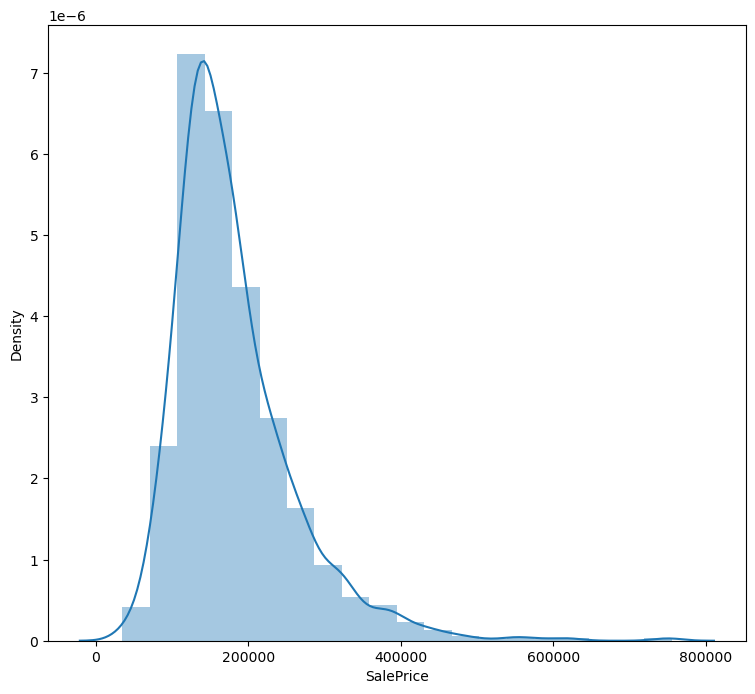

In [97]:


print(train['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(train['SalePrice'], bins=20, hist_kws={'alpha': 0.4});



In [98]:
train_numeric = train.select_dtypes(exclude = 'object' )
train_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'Bedroo

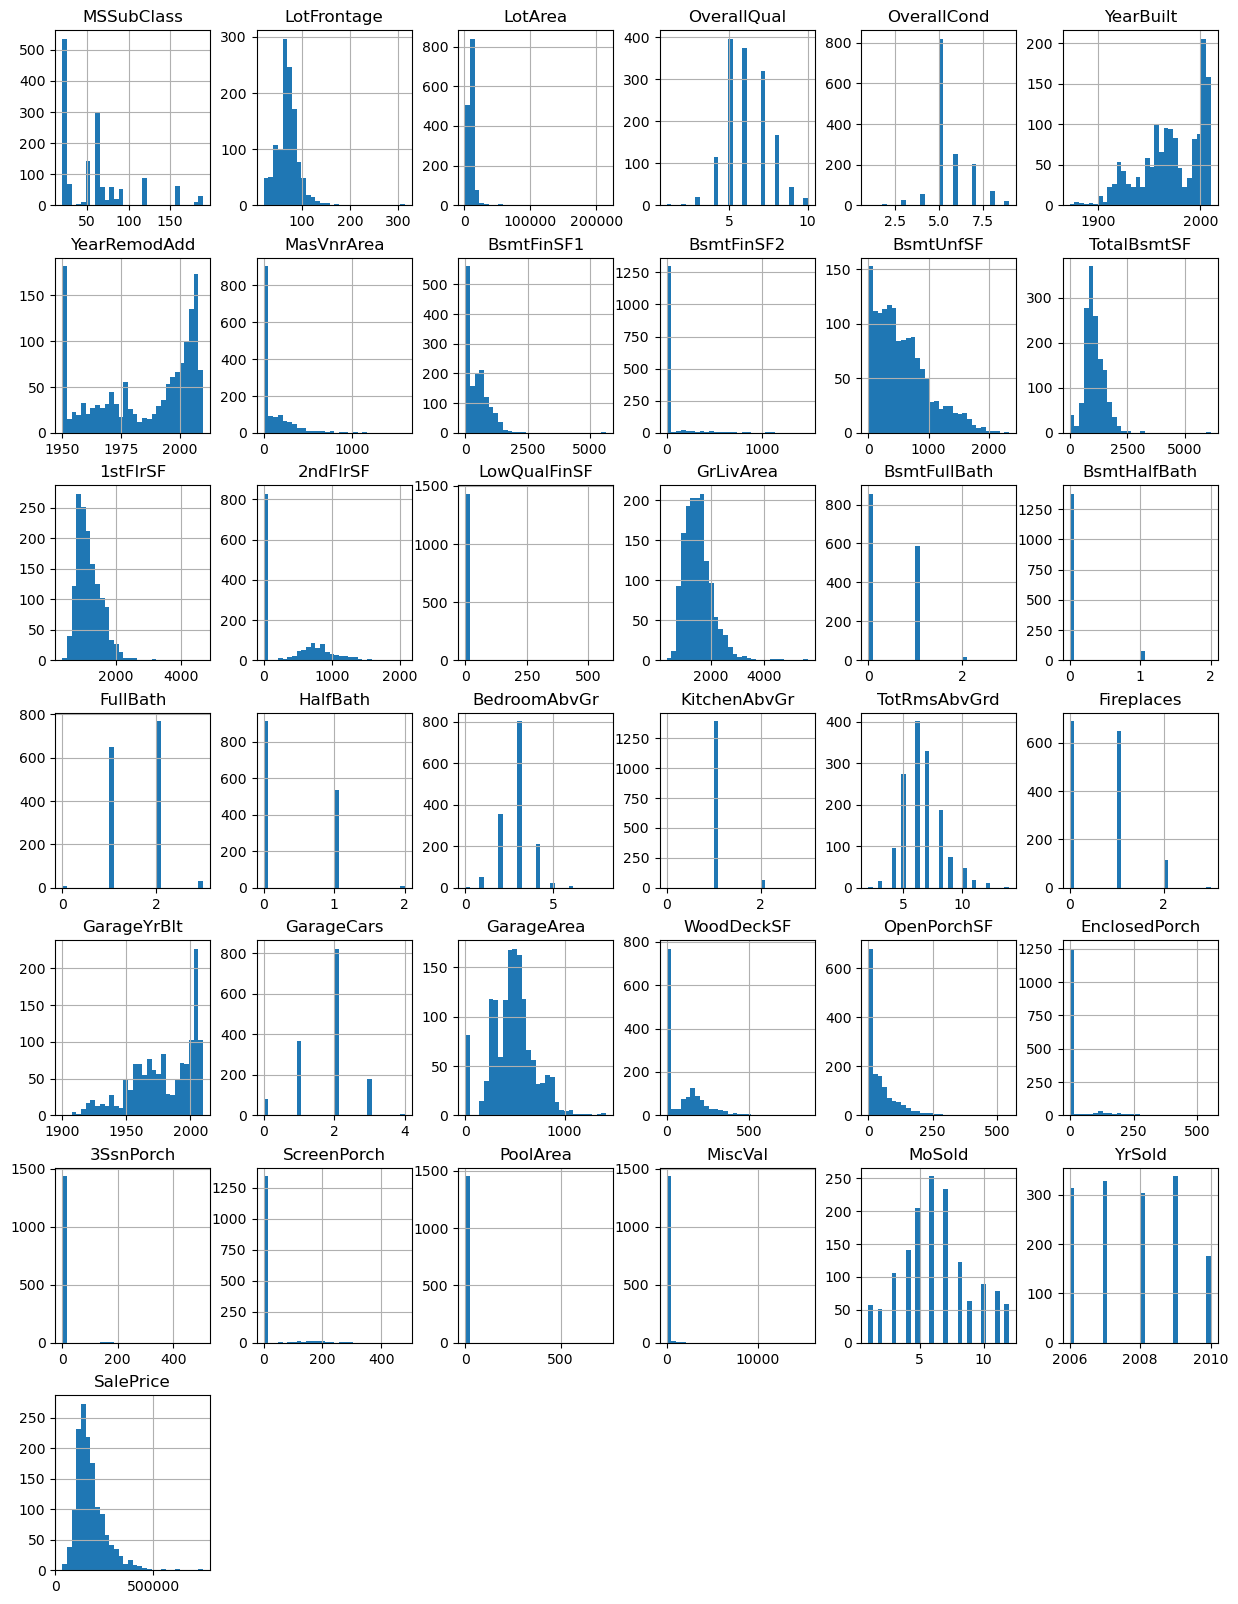

In [99]:
train_numeric.hist(figsize=(15,20),bins=30)

# Model Building & Train

In [145]:


import numpy as np


def split_dataset(dataset, test_ratio=0.30):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

train_ds_pd, valid_ds_pd = split_dataset(train)
print("{} examples in training, {} examples in testing.".format(
    len(train_ds_pd), len(valid_ds_pd)))



1008 examples in training, 452 examples in testing.




There's one more step required before we can train the model. We need to convert the datatset from Pandas format (pd.DataFrame) into TensorFlow Datasets format (tf.data.Dataset).

In [146]:


label = 'SalePrice'
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label, task =tfdf.keras.Task.REGRESSION)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label, task =tfdf.keras.Task.REGRESSION)

In [158]:
feature_columns=train_ds_pd.columns.tolist()
feature_columns=feature_columns[:-1]

NameError: name 'tft' is not defined

## Select a Model


    * RandomForestModel
    * GradientBoostedTreesModel
    * CartModel
    * DistributedGradientBoostedTreesModel


In [104]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

## Create a Random Forest

In [105]:

rf = tfdf.keras.GradientBoostedTreesModel(task = tfdf.keras.Task.REGRESSION)
rf.compile(metrics=["mse"],optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              loss='mean_squared_error') # Optional, you can use this to include a list of eval metrics




Use /tmp/tmppeh_pnl8 as temporary training directory


[WARNING 23-08-11 17:08:35.4600 UTC gradient_boosted_trees.cc:1818] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 23-08-11 17:08:35.4601 UTC gradient_boosted_trees.cc:1829] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 23-08-11 17:08:35.4601 UTC gradient_boosted_trees.cc:1843] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


### Train the model

In [106]:
rf.fit(x=train_ds)

Reading training dataset...
Training dataset read in 0:00:00.866061. Found 1008 examples.
Training model...
Model trained in 0:00:02.208607
Compiling model...


[INFO 23-08-11 17:08:38.5503 UTC kernel.cc:1243] Loading model from path /tmp/tmppeh_pnl8/model/ with prefix 985845cf2c5e454a
[INFO 23-08-11 17:08:38.5555 UTC abstract_model.cc:1311] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 23-08-11 17:08:38.5555 UTC kernel.cc:1075] Use fast generic engine


Model compiled.


### Evaluate the model

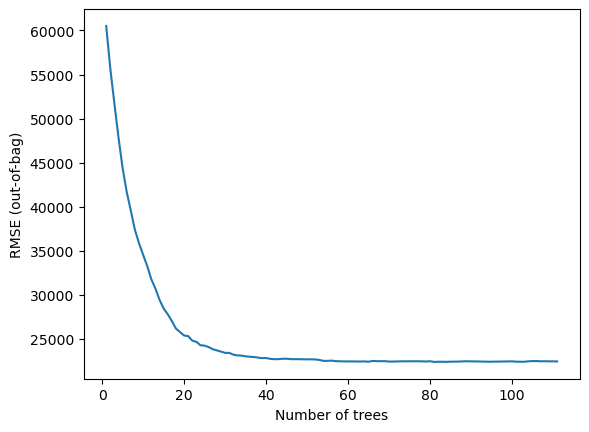

In [107]:
logs = rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("RMSE (out-of-bag)")
plt.show()



In [108]:


inspector = rf.make_inspector()
inspector.evaluation()



Evaluation(num_examples=None, accuracy=None, loss=22381.966796875, rmse=22381.966796875, ndcg=None, aucs=None, auuc=None, qini=None)

In [109]:


evaluation = rf.evaluate(x=valid_ds,return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")



1/1 [==============================] - 0s 387ms/step - loss: 549048768.0000 - mse: 549048768.0000
loss: 549048768.0000
mse: 549048768.0000


### Variable importances

Variable importances generally indicate how much a feature contributes to the model predictions or quality. There are several ways to identify important features using TensorFlow Decision Forests. Let us list the available Variable Importances for Decision Trees:

In [110]:


print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)



Available variable importances:
	 SUM_SCORE
	 INV_MEAN_MIN_DEPTH
	 NUM_NODES
	 NUM_AS_ROOT


In [111]:
inspector.variable_importances()["NUM_AS_ROOT"]

[("OverallQual" (1; #62), 15.0),
 ("1stFlrSF" (1; #0), 6.0),
 ("Condition1" (4; #17), 5.0),
 ("LotFrontage" (1; #49), 5.0),
 ("LotConfig" (4; #48), 4.0),
 ("BsmtFinSF2" (1; #9), 3.0),
 ("BsmtUnfSF" (1; #15), 3.0),
 ("ExterQual" (4; #22), 3.0),
 ("GrLivArea" (1; #38), 3.0),
 ("KitchenQual" (4; #44), 3.0),
 ("LotArea" (1; #47), 3.0),
 ("Neighborhood" (4; #59), 3.0),
 ("OpenPorchSF" (1; #60), 3.0),
 ("BsmtFinSF1" (1; #8), 2.0),
 ("BsmtQual" (4; #14), 2.0),
 ("EnclosedPorch" (1; #20), 2.0),
 ("GarageArea" (1; #31), 2.0),
 ("GarageCars" (1; #32), 2.0),
 ("PoolArea" (1; #64), 2.0),
 ("WoodDeckSF" (1; #75), 2.0),
 ("BsmtCond" (4; #6), 1.0),
 ("BsmtExposure" (4; #7), 1.0),
 ("Condition2" (4; #18), 1.0),
 ("Exterior1st" (4; #23), 1.0),
 ("Functional" (4; #30), 1.0),
 ("GarageType" (4; #36), 1.0),
 ("OverallCond" (1; #61), 1.0),
 ("TotalBsmtSF" (1; #73), 1.0)]

In [112]:
tfdf.model_plotter.plot_model_in_colab(rf, tree_idx=0, max_depth=3)

# Data Submission

In [113]:
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test ,task = tfdf.keras.Task.REGRESSION )
ids = test.pop('Id')
preds = rf.predict(test_ds)
output = pd.DataFrame({'Id': ids,
                       'SalePrice': preds.squeeze()})

output.head()

2/2 [==============================] - 1s 14ms/step


,Id,SalePrice
0,1461,122866.132812
1,1462,158122.562500
2,1463,187113.375000
3,1464,187113.687500
4,1465,203617.500000


In [114]:


sample_submission_df = pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')
sample_submission_df['SalePrice'] = rf.predict(test_ds)
sample_submission_df.to_csv('submission.csv', index=False)
sample_submission_df.head()



2/2 [==============================] - 0s 13ms/step


,Id,SalePrice
0,1461,122866.132812
1,1462,158122.562500
2,1463,187113.375000
3,1464,187113.687500
4,1465,203617.500000
